In [17]:
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Creat a little Dataset for first test and gain time

In [18]:
df_train = pd.read_csv('./data/fashion-mnist_train.csv')

In [19]:
label_tain = df_train['label']
data_train = df_train.drop('label', axis=1)

In [20]:
label_tain = label_tain[:len(label_tain)//10]

In [21]:
data_train = data_train[:len(data_train)//10]

In [22]:
label_tain.shape

(6000,)

In [23]:
data_train.shape

(6000, 784)

In [24]:
train_set, test_set, train_labels, test_labels = train_test_split(data_train, label_tain, test_size=0.5, random_state=42)

In [25]:
train_set.shape

(3000, 784)

In [26]:
train_labels.shape

(3000,)

# Try SVM models

In [27]:
model = SVC(C=1, kernel='rbf')
model.fit(train_set, train_labels)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [28]:
prediction = model.predict(test_set)

In [29]:
model.score(test_set, test_labels)

0.832

In [30]:
matrice = confusion_matrix(test_labels, prediction)

In [31]:
print(classification_report(test_labels, prediction))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       317
           1       0.99      0.94      0.97       298
           2       0.74      0.70      0.72       283
           3       0.80      0.89      0.84       311
           4       0.76      0.77      0.76       300
           5       0.93      0.86      0.90       312
           6       0.60      0.57      0.59       312
           7       0.87      0.91      0.89       300
           8       0.95      0.93      0.94       285
           9       0.90      0.95      0.92       282

    accuracy                           0.83      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.83      0.83      0.83      3000



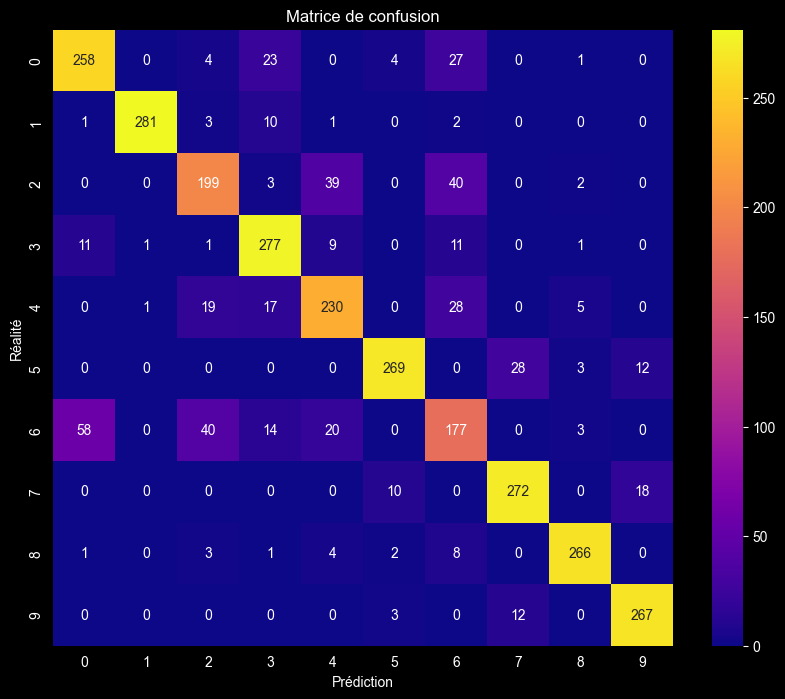

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(matrice, annot=True, fmt='d', cmap='plasma',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Prédiction')
plt.ylabel('Réalité')
plt.title('Matrice de confusion')
plt.show()